# Visualizing your data

In this notebook we will se various ways to create maps from  your geo dataframe.

One thing to know is that GeoPandas is based on Shapely, among other libraries. . Shapely is the library that stores geometrical objects in GeoPandas. Shapely is installed automatically when you install GeoPandas.

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib

In [2]:
# Data for five large global cities (one from each continent)
cities_dic = {
    "Name": ["New York City", "São Paulo", "Tokyo", "Lagos", "Sydney"],
    "Population": [8419600, 12325232, 13929286, 15000000, 5312163],  # Approximate populations
    "Latitude": [40.7128, -23.5505, 35.6895, 6.5244, -33.8688],
    "Longitude": [-74.0060, -46.6333, 139.6917, 3.3792, 151.2093]
}


In [3]:
gdf = gpd.GeoDataFrame(
    cities_dic, 
    geometry=gpd.points_from_xy(
        cities_dic['Longitude'],
          cities_dic['Latitude']
          )
        )
gdf

,Name,Population,Latitude,Longitude,geometry
0,New York City,8419600,40.7128,-74.0060,POINT (-74.006 40.7128)
1,São Paulo,12325232,-23.5505,-46.6333,POINT (-46.6333 -23.5505)
2,Tokyo,13929286,35.6895,139.6917,POINT (139.6917 35.6895)
3,Lagos,15000000,6.5244,3.3792,POINT (3.3792 6.5244)
4,Sydney,5312163,-33.8688,151.2093,POINT (151.2093 -33.8688)


In [4]:
# !pipenv install matplotlib

# Quick visualizations

<class 'matplotlib.axes._axes.Axes'>


<Axes: >

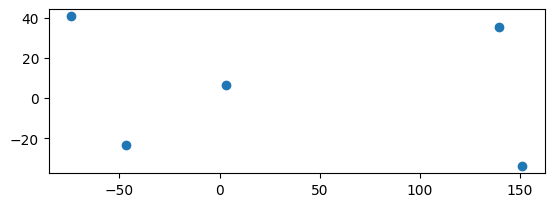

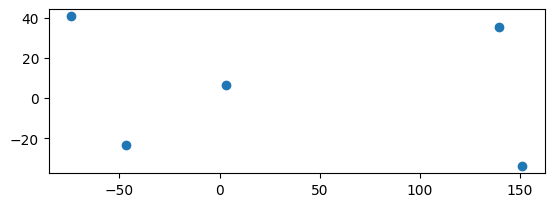

In [5]:
print(type(gdf.plot()))
gdf.plot()

In [8]:
print(type(gdf.explore()))
gdf.explore()

ImportError: The 'folium', 'matplotlib' and 'mapclassify' packages are required for 'explore()'. You can install them using 'conda install -c conda-forge folium matplotlib mapclassify' or 'pip install folium matplotlib mapclassify'.

Where is the map? We only see five poings, corresponding to the five cities. But they are spread out on the never ending story's nothing. There is no context, no base map for the cities.

That is because we have not yet provided a CRS.

In [ ]:
gdf.crs

In [ ]:
gdf = gdf.set_crs(epsg=4326)
# gdf = gdf.set_crs('EPSG:4326')

In [ ]:
gdf.crs

In [ ]:
print(type(gdf.explore()))
gdf.explore()

# With matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Create a figure and axis object using matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame `gdf` on the axis `ax`, using red points with size 50
gdf.plot(ax=ax, color='red', markersize=50)

# Loop through each point's x and y coordinates and its corresponding "Population" value
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["Population"]):
    # Write each point's corresponding population value
    ax.text(x, y, f"{label:,.0f}", fontsize=8, color='black', ha='left')

# Set a title for the entire plot
plt.title("Point Dataset with Labels")

# Display the plot
plt.show()


# Using leafmap

In [ ]:
#!pipenv install folium mapclassify #-q
# !pipenv install leafmap -q
# !pipenv install ipywidgets

In [ ]:
import leafmap

In [ ]:
m = leafmap.Map(center=[0, -0], zoom=2)
print(type(m))
m

In [ ]:
m.add_gdf(gdf, layer_name="Points")

In [ ]:
wisconsin = 'POLYGON((-90.6303 42.5116,-87.0241 42.4954,-87.1477 43.3721,-87.1230 43.6838,-86.9911 44.1694,-86.8579 44.4828,-86.6876 44.8792,-86.2523 45.2343,-86.7535 45.4418,-87.1024 45.4438,-87.1724 45.3531,-87.3193 45.2401,-87.4100 45.1995,-87.4443 45.0784,-87.6379 45.0987,-87.6956 45.2217,-87.6462 45.3367,-87.6956 45.3869,-87.8549 45.3425,-87.7945 45.4813,-87.7945 45.5679,-87.7876 45.6764,-87.9936 45.7934,-88.1145 45.8077,-88.0733 45.8728,-88.1982 45.9521,-88.5498 46.0122,-88.7036 45.9970,-88.8451 46.0380,-89.0909 46.1389,-90.1195 46.3412,-90.4147 46.5664,-89.9615 47.2876,-90.6578 47.3100,-92.0352 46.7079,-92.2948 46.5928,-92.2975 46.0761,-92.3579 46.0132,-92.5227 45.9769,-92.7466 45.8135,-92.8564 45.6140,-92.7754 45.5477,-92.6587 45.4293,-92.7136 45.3029,-92.7466 44.9648,-92.7686 44.7877,-92.6422 44.6530,-92.3552 44.5504,-92.2632 44.4652,-92.0654 44.4024,-91.8745 44.2580,-91.6383 44.0600,-91.4941 43.9612,-91.3184 43.8296,-91.2524 43.6440,-91.2305 43.5167,-91.2085 43.3342,-91.0547 43.2932,-91.1865 43.1651,-91.1536 43.0257,-91.1426 42.9082,-91.0547 42.7692,-90.7910 42.6915,-90.7031 42.6340,-90.6303 42.5096,-90.6303 42.5116))'
data = {
    "Name": ["Wisconsin"],
    "Population": [5911000],  # Approximate populations
    "geometry_str": [wisconsin],
}
data
gdf_wis = gpd.GeoDataFrame(data, 
                       geometry=gpd.GeoSeries.from_wkt(data['geometry_str']))

m.add_gdf(gdf_wis, layer_name="States")

In [ ]:
m.basemap

In [ ]:
# m.add_basemap("Esri.WorldImagery")  # Satellite imagery
# m.add_basemap("OpenStreetMap")      # OpenStreetMap layer
m.add_basemap("Google Maps")      # OpenStreetMap layer

In [ ]:
gdf

In [ ]:
# m = leafmap.Map(center=[0, 0], zoom=2)
# m.add_gdf(gdf, layer_name="Points", 
#           popup=['Name', 'Population'])
# m

In [ ]:
# !pipenv install lonboard palettable sidecar -q

In [ ]:
# !pipenv install pyarrow fastparquet

# Using lonboard

In [ ]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import shapely
from palettable.colorbrewer.diverging import BrBG_10
from sidecar import Sidecar

from lonboard import Map, ScatterplotLayer
from lonboard.colormap import apply_continuous_cmap

In [ ]:
# Define a local path to save/load the parquet file if it exists
local_path = Path('../../geopandas_101_DATA/Forrest/data/internet-speeds.parquet')

# Define the remote URL where the parquet file is hosted (Ookla open data)
url = "https://ookla-open-data.s3.us-west-2.amazonaws.com/parquet/performance/type=mobile/year=2019/quarter=1/2019-01-01_performance_mobile_tiles.parquet"

# If the file already exists locally...
if local_path.exists():
    # Load the local Parquet file into a GeoDataFrame
    gdf = gpd.read_parquet(local_path)

# If the file has not been saved locally...
else:
    # Define which columns to extract from the remote parquet file
    columns = ["avg_d_kbps", "tile"]  # Average download speed in kbps and tile geometry as WKT

    # Read only the specified columns from the remote parquet file into a pandas DataFrame
    df = pd.read_parquet(url, columns=columns)

    # Convert the 'tile' column (which is in WKT format) into shapely geometry objects
    tile_geometries = shapely.from_wkt(df["tile"])

    # Compute the centroid of each tile geometry for plotting as a point later
    tile_centroids = shapely.centroid(tile_geometries)

    # Create a GeoDataFrame using the average download speed and the computed centroids as geometry
    gdf = gpd.GeoDataFrame(df[["avg_d_kbps"]], geometry=tile_centroids, crs="EPSG:4326")

    # Save the resulting GeoDataFrame as a parquet file locally for future use
    gdf.to_parquet(local_path)


In [ ]:
print(len(gdf))
gdf.head()

In [ ]:
sidecar = Sidecar()
type(sidecar)

In [ ]:
layer = ScatterplotLayer.from_geopandas(gdf)

m = Map(layer, _height=800)
# with sidecar:
#     display(m)
m

In [ ]:
layer.get_fill_color = [0, 0, 200, 200]

In [ ]:
min_bound = 5000
max_bound = 50000
download_speed = gdf["avg_d_kbps"]
normalized_download_speed = (download_speed - min_bound) / (max_bound - min_bound)

In [ ]:
normalized_download_speed

In [ ]:
BrBG_10.mpl_colormap


In [ ]:
layer.get_fill_color = apply_continuous_cmap(
    normalized_download_speed, BrBG_10, alpha=0.7
)

In [ ]:
layer.get_radius = normalized_download_speed * 200
layer.radius_units = "meters"
layer.radius_min_pixels = 0.5

In [ ]:
m